In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
plt.show()

In [2]:
train_data = pd.read_csv('clean_train.csv')
train_data

,PassengerId,Name,Title,Sex,Age,AgeCategory,FamilyMembers,Pclass,Ticket,Fare,Embarked,C,Q,S,Survived
0,1,"Braund, Mr. Owen Harris",Mr,1,22.0,Teenager,1,3,A/5 21171,7.2500,S,0.0,0.0,1.0,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,0,38.0,Adult,1,1,PC 17599,71.2833,C,1.0,0.0,0.0,1
2,3,"Heikkinen, Miss. Laina",Miss,0,26.0,Youngadult,0,3,STON/O2. 3101282,7.9250,S,0.0,0.0,1.0,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,0,35.0,Youngadult,1,1,113803,53.1000,S,0.0,0.0,1.0,1
4,5,"Allen, Mr. William Henry",Mr,1,35.0,Youngadult,0,3,373450,8.0500,S,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,887,"Montvila, Rev. Juozas",Officer,1,27.0,Youngadult,0,2,211536,13.0000,S,0.0,0.0,1.0,0
884,888,"Graham, Miss. Margaret Edith",Miss,0,19.0,Teenager,0,1,112053,30.0000,S,0.0,0.0,1.0,1
885,889,"Johnston, Miss. Catherine Helen ""Carrie""",Miss,0,28.0,Youngadult,3,3,W./C. 6607,23.4500,S,0.0,0.0,1.0,0
886,890,"Behr, Mr. Karl Howell",Mr,1,26.0,Youngadult,0,1,111369,30.0000,C,1.0,0.0,0.0,1


# Pairplot to get an overview of survivability

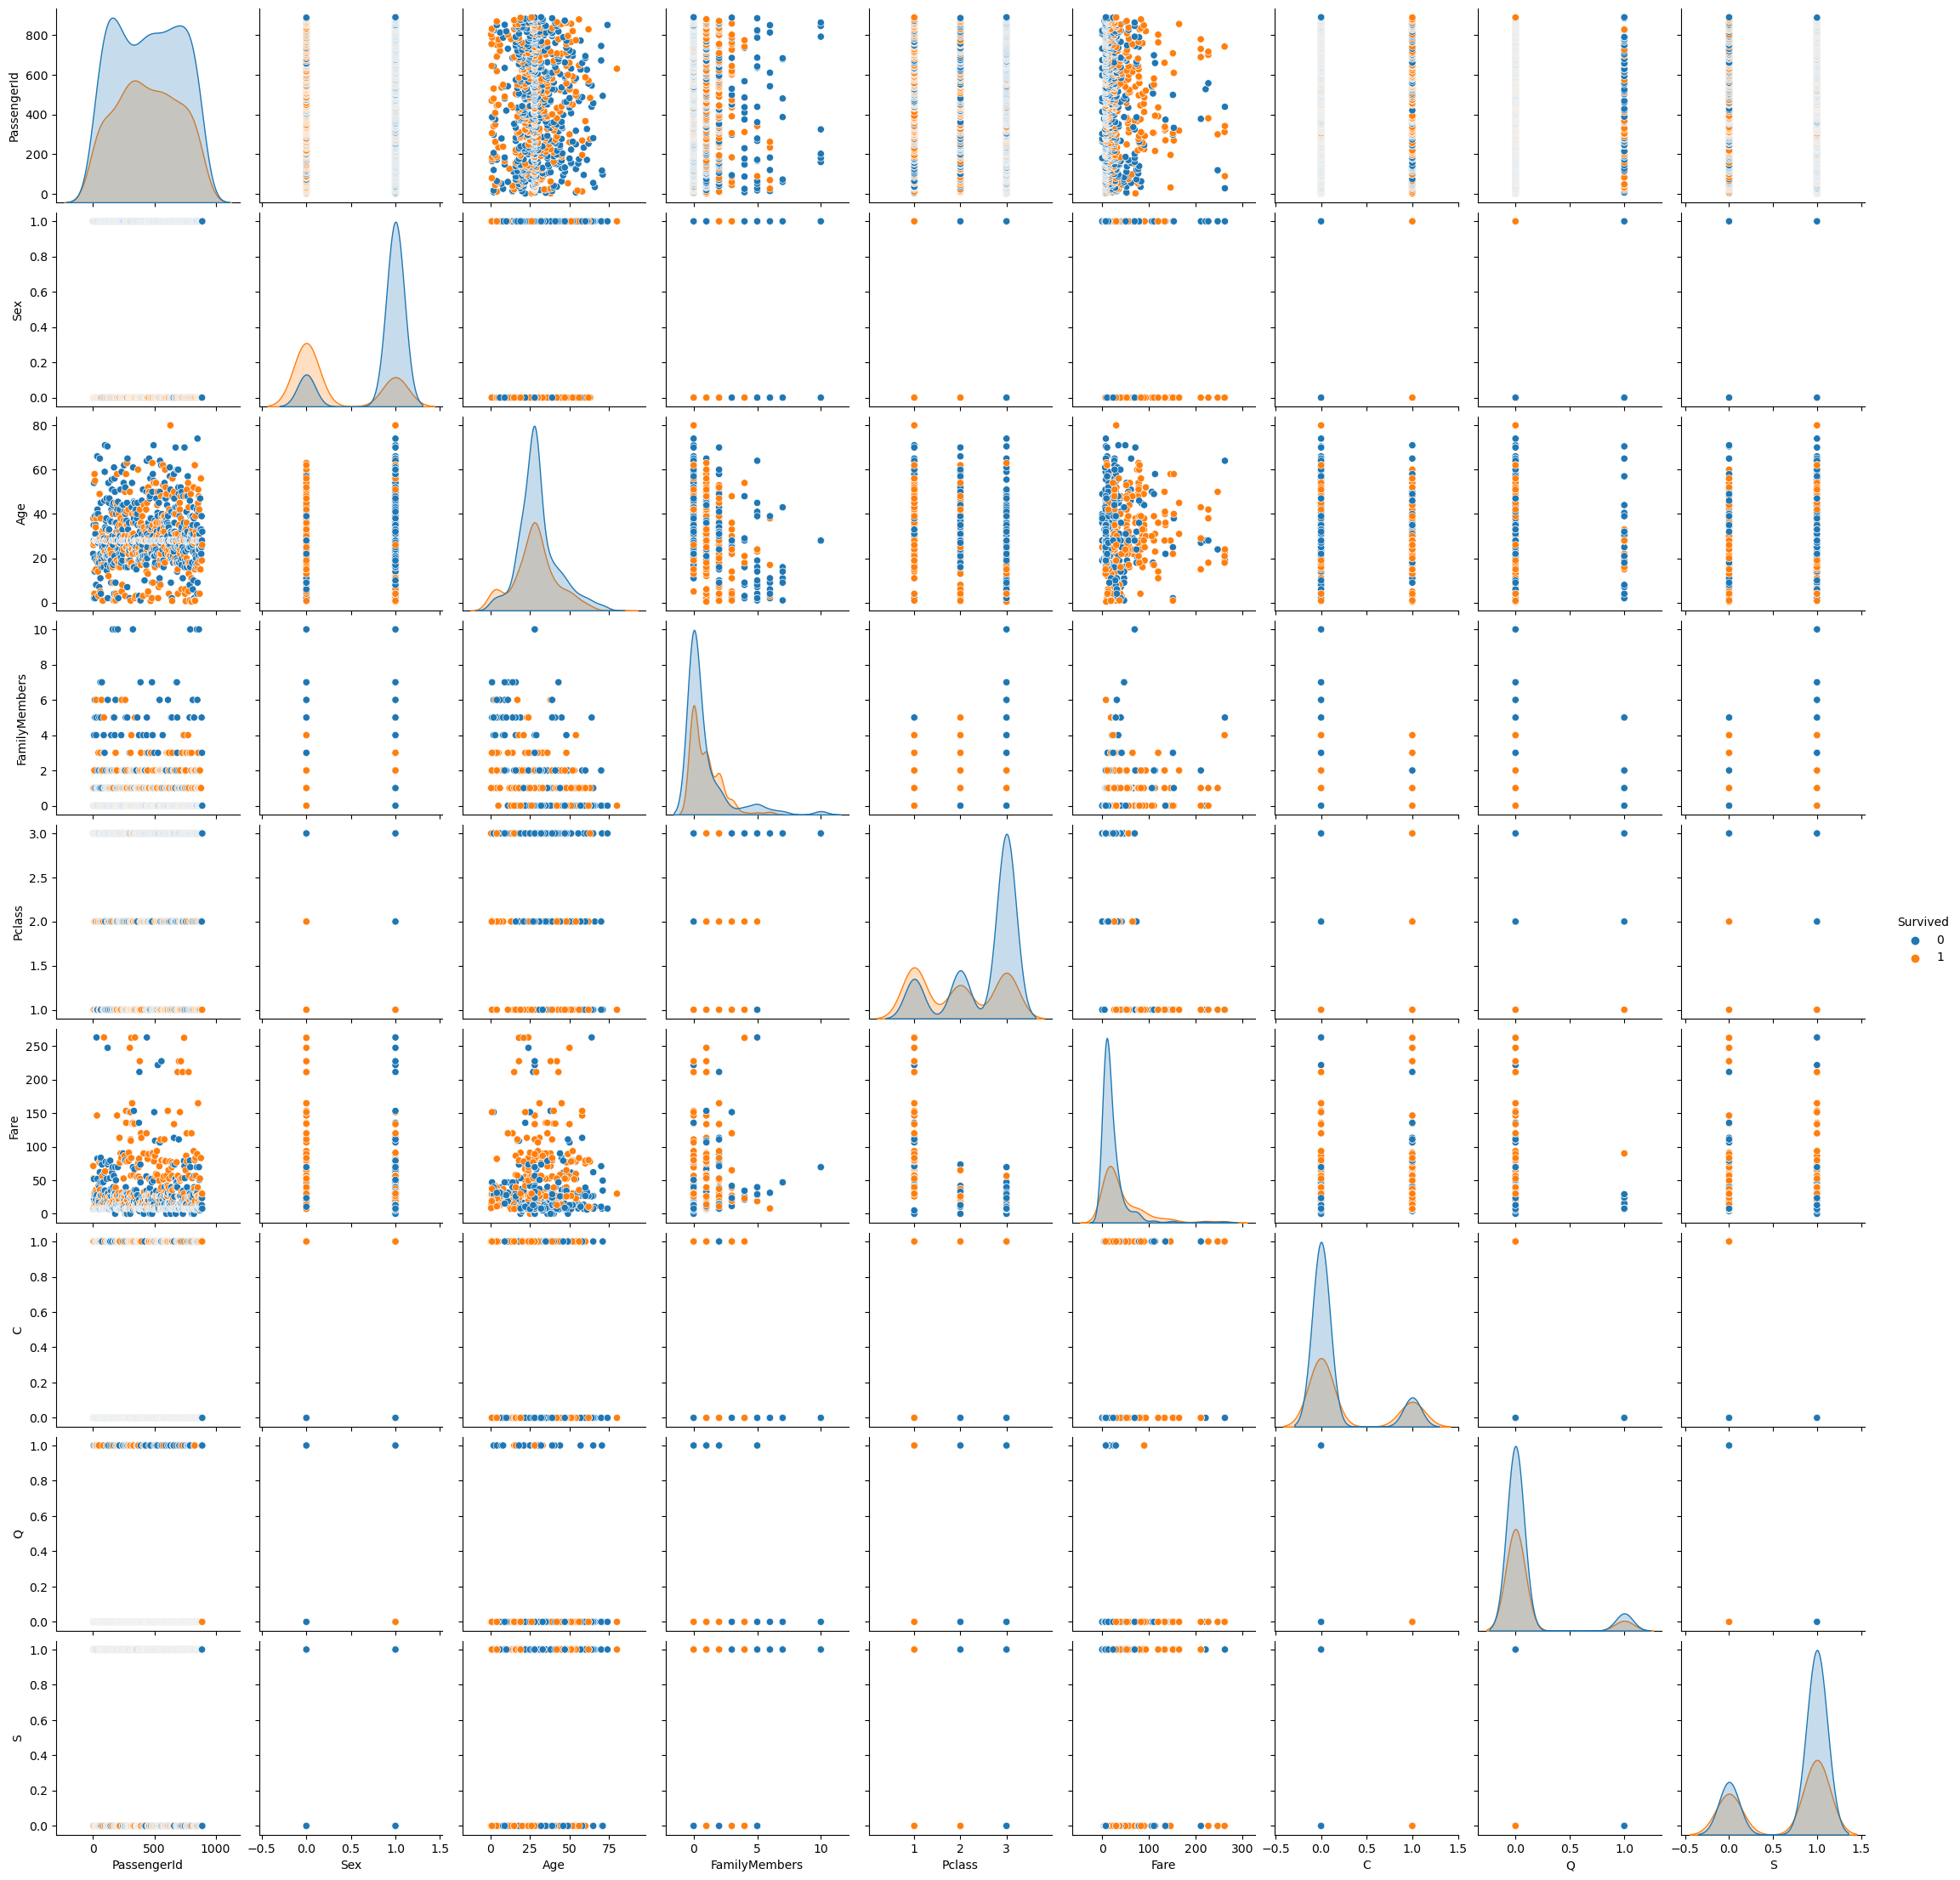

In [7]:
sb.pairplot(train_data, hue="Survived")

# Correlation Analysis

In [5]:
# Correlation Matrix
train_data.corr()

,PassengerId,Sex,Age,FamilyMembers,Pclass,Fare,C,Q,S,Survived
PassengerId,1.000000,0.040265,0.033552,-0.040018,-0.033005,-0.002046,-0.004322,-0.033204,0.024761,-0.006916
Sex,0.040265,1.000000,0.081203,-0.201830,0.132881,-0.222361,-0.083882,-0.074207,0.120176,-0.545899
Age,0.033552,0.081203,1.000000,-0.245281,-0.338998,0.098801,0.027240,-0.030954,-0.004231,-0.067081
FamilyMembers,-0.040018,-0.201830,-0.245281,1.000000,0.064413,0.276580,-0.044070,-0.058991,0.075780,0.018211
Pclass,-0.033005,0.132881,-0.338998,0.064413,1.000000,-0.604960,-0.234999,0.220331,0.066029,-0.334068
Fare,-0.002046,-0.222361,0.098801,0.276580,-0.604960,1.000000,0.245481,-0.129578,-0.132543,0.261742
C,-0.004322,-0.083882,0.027240,-0.044070,-0.234999,0.245481,1.000000,-0.147200,-0.780515,0.160969
Q,-0.033204,-0.074207,-0.030954,-0.058991,0.220331,-0.129578,-0.147200,1.000000,-0.503435,0.004981
S,0.024761,0.120176,-0.004231,0.075780,0.066029,-0.132543,-0.780515,-0.503435,1.000000,-0.143763
Survived,-0.006916,-0.545899,-0.067081,0.018211,-0.334068,0.261742,0.160969,0.004981,-0.143763,1.000000


<AxesSubplot:>

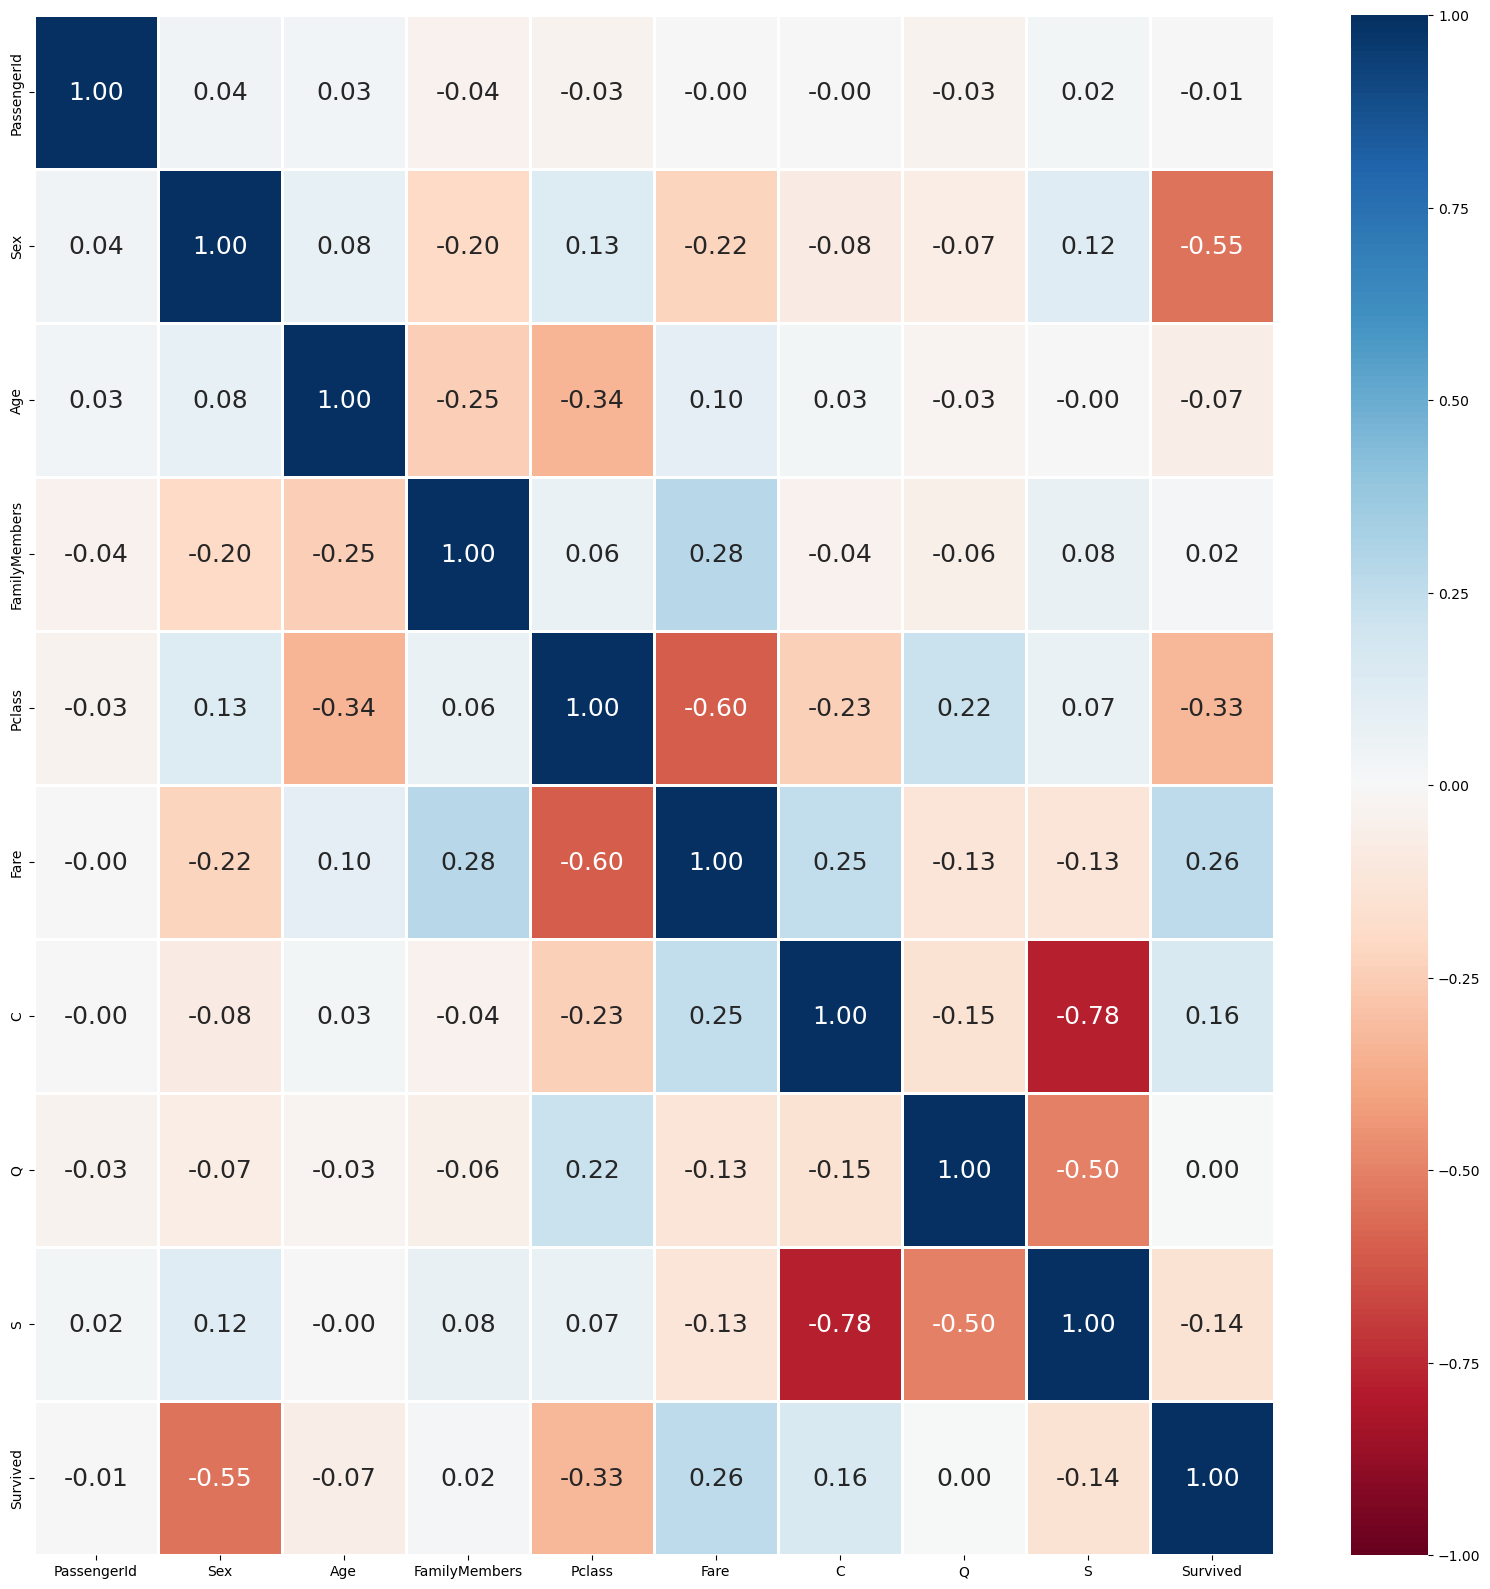

In [6]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(train_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

### Analysing the Correlation HeatMap

##### Since our aim is to predict surival of passengers, we have to focus on the attributes that are strongly related to 'Survived.' 
We must consider attributes that are strongly positively and negatively correlated, the ones will correlation close to 0 are not very significant.
Following are the conclusions we can draw from this heatmap: 

1. 'Sex' is negatively correalted to 'Survived'. As per our encoding, 1 is used for Male passengers and 0 for female passengers. This implies that the lower the value for Sex, the more likely said passenger is to survive. According to this, we can conclude that female passengers are more likely to survive than male passengers.

2.  PClass is highly negatively correlated to Survived. This implies that since a lower value in PClass indicates a better class, such as 1 indicates first class, the people in a better class depicted by lower PClass number were more likely to survive. 

3. Fare is positively correalted to Survived and negatively to PClass. This implies that the lower the PClass number i.e the better the class, the more the people will pay in fare and thus, they will be more likely to survive. 

4. The other attributes such as Family Members and port of embarkment are not strongly correlated to Survived since their correlation is close to 0. These may not be as essential in predicting 'Survived'.

# Overview of passengers who survived

Text(0, 0.5, 'Count')

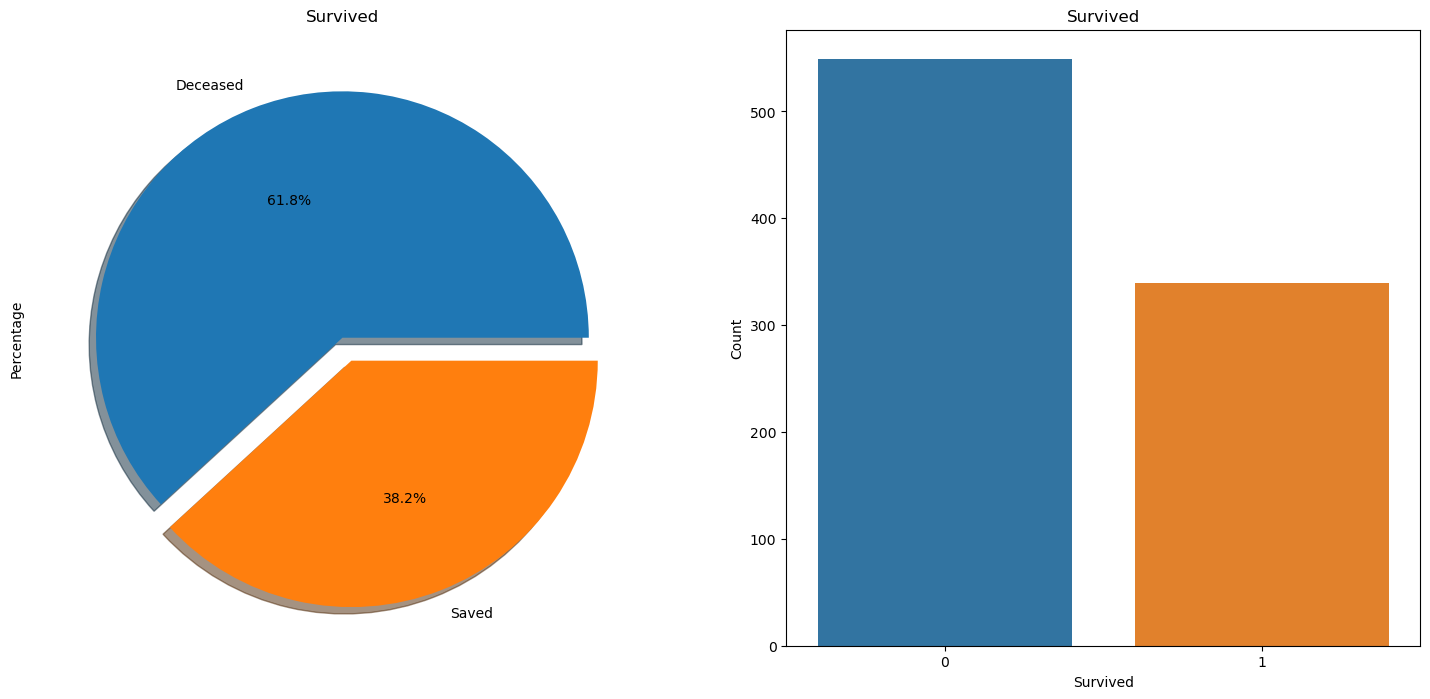

In [12]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train_data['Survived'].value_counts().plot.pie(labels=['Deceased','Saved'], explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('Percentage')
sb.countplot(data=train_data, x='Survived', ax=ax[1])
ax[1].set_title('Survived')
ax[1].set_ylabel('Count')

##### As highlighted above, out of the 891 passengers on board, only 38.4% of them survived.

### Does one gender have a higher survival rate than the other?

Text(0.5, 1.0, 'State after the sinking by Sex')

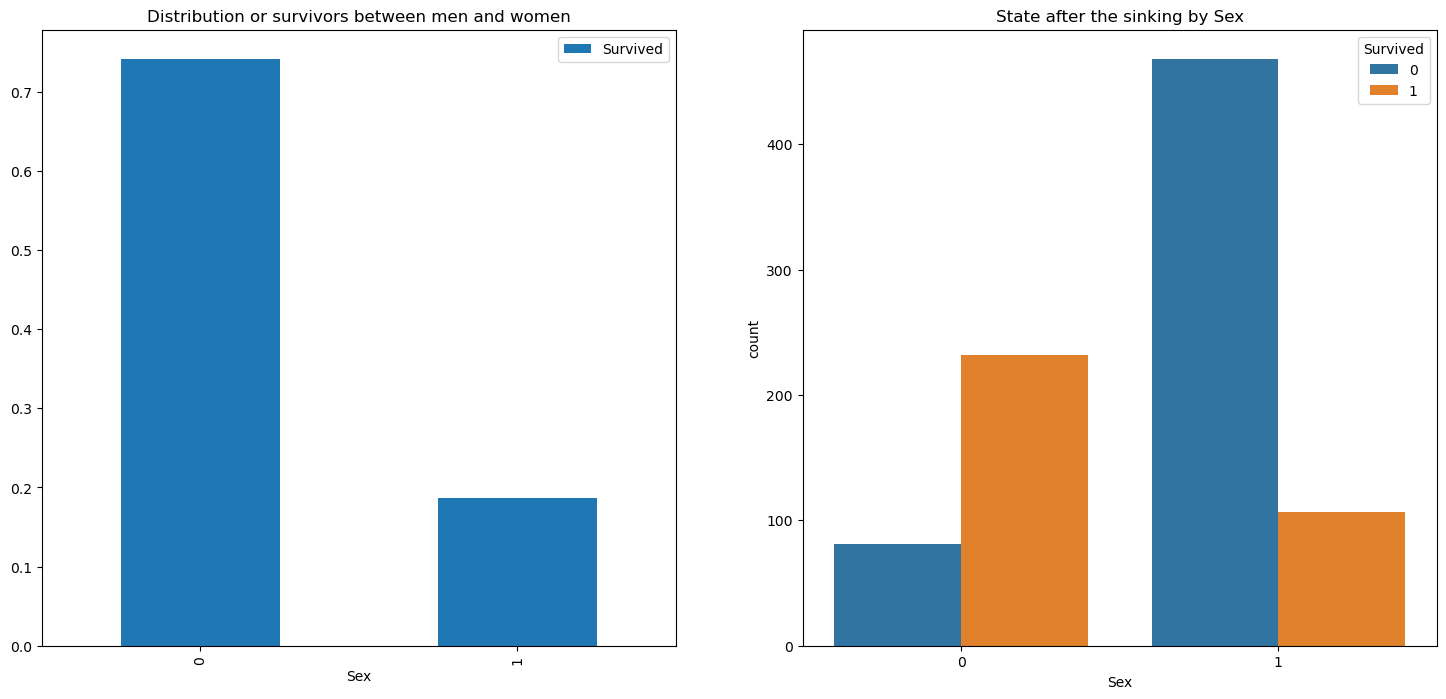

In [11]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train_data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Distribution or survivors between men and women')
sb.countplot(data=train_data, x='Sex',hue='Survived', ax=ax[1])
ax[1].set_title('State after the sinking by Sex')

##### Analysis

- We already know that there is a majority of men on the ship but we can see that it doesn't mean that they have a higher chance of survival. 

- A little less than 20% of the survivors are men. 

- Moreover, we can see that more than twice as many women are saved from the sinking than men. 

- Clearly, women are more likely to survive than men as highlighted by the plots above indicating that 'Sex' could be an important factor in predicting survival.

### Does passenger class impact chances of survival?


In [17]:
pd.crosstab(train_data.Pclass, train_data.Survived, margins=True).style.background_gradient(cmap='rocket_r')

Survived,0,1,All
Pclass,,,
1,80,133,213
2,97,87,184
3,372,119,491
All,549,339,888


Text(0.5, 1.0, 'Pclass: Deceased / Saved')

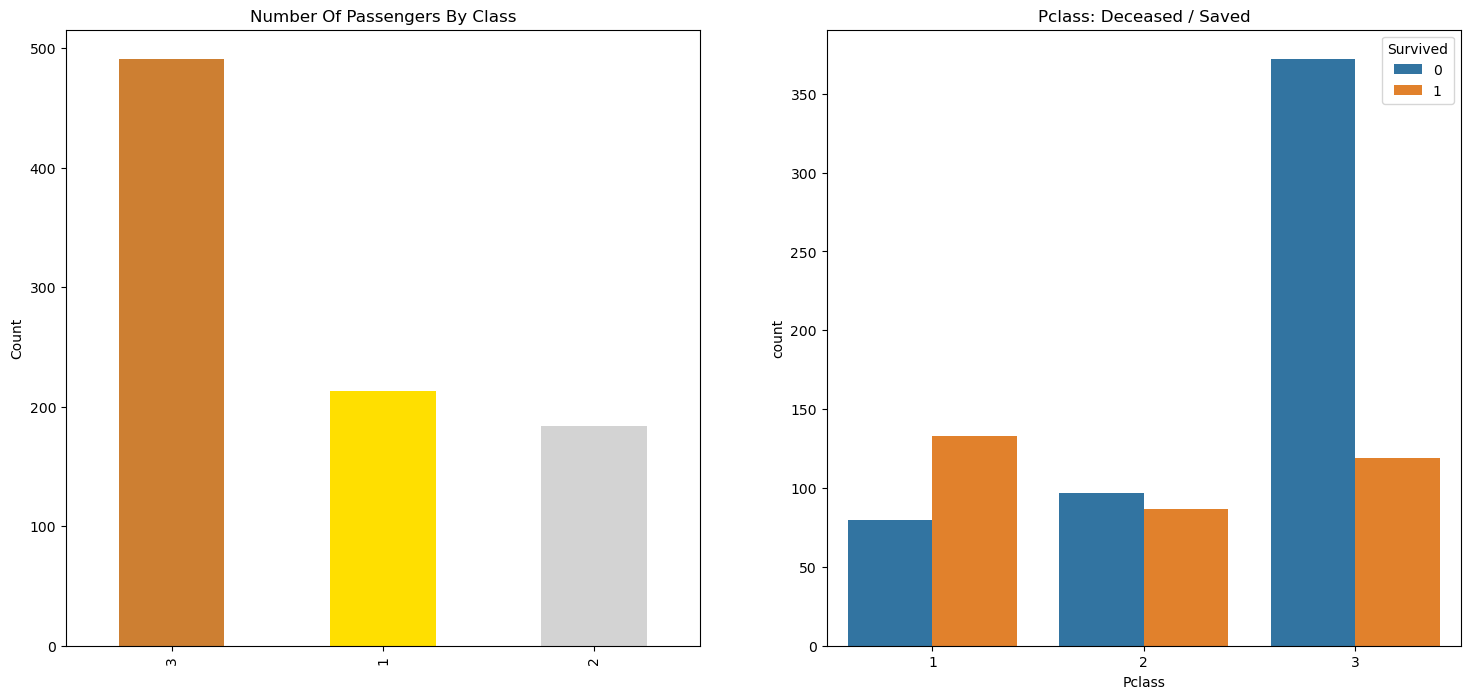

In [18]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train_data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Class')
ax[0].set_ylabel('Count')
sb.countplot(data=train_data, x='Pclass', hue='Survived', ax=ax[1])
ax[1].set_title('Pclass: Deceased / Saved')

##### Analysis

- As we can see from the graphs above, maximum number of passengers are in third class. However from our second plot we can see that most of the third class passengers did not survive. 

- On the other hand, a higher percentage of the first class passengers survived.

### Combining Sex and PClass, which both seem to be important factors in predicting who survived.

In [19]:
pd.crosstab([train_data.Sex,train_data.Survived],train_data.Pclass,margins=True).style.background_gradient(cmap='rocket_r')

##### Analysis

- We can clearly see that only 3 women from first class did not survive as opposed to 77 men from first class who did not survive. 

- This clearly shows that even amongst the first class passengers which have the highest survival rate, women are much more likely to survive.

<Figure size 2000x2000 with 0 Axes>

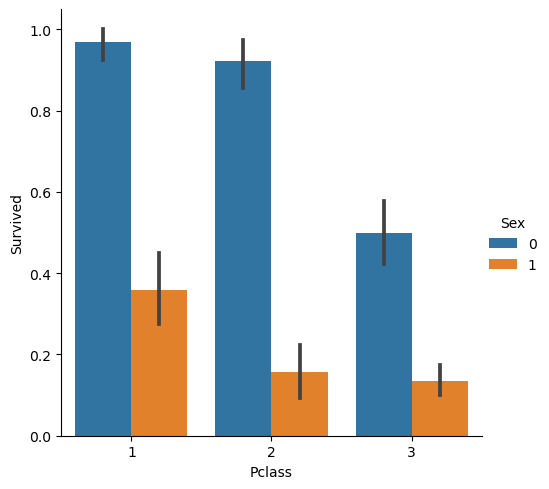

In [26]:
f = plt.figure(figsize=(20, 20))
sb.catplot(data=train_data, x='Pclass', y='Survived', hue='Sex', kind="bar")
plt.show()

##### We can see from the plots above that that in each of the three passenger classes, female passengers(encoded as 0) are more likely to survive. 

### Is port of embarkment an important feature affecting survival?

###### Categories:
S: Southampton
<br>
Q: Queenstown
<br>
C: Cherbourg

In [29]:
pd.crosstab([train_data.Embarked,train_data.Pclass],
            [train_data.Sex,train_data.Survived],margins=True).style.background_gradient(cmap='rocket_r')

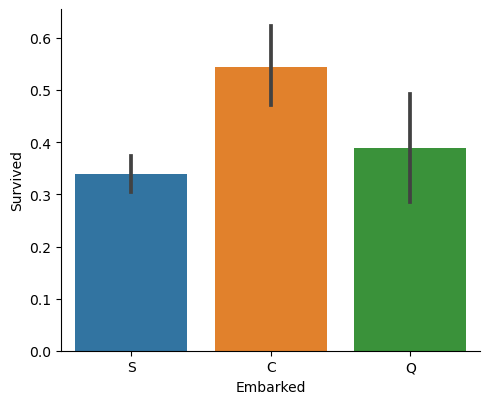

In [35]:
sb.catplot(data=train_data, x='Embarked', y='Survived', kind="bar")
fig=plt.gcf()
fig.set_size_inches(5,4)

##### From the plot we can see that Cherbourg has the highest survival rate.

##### This can be further explored as follows:

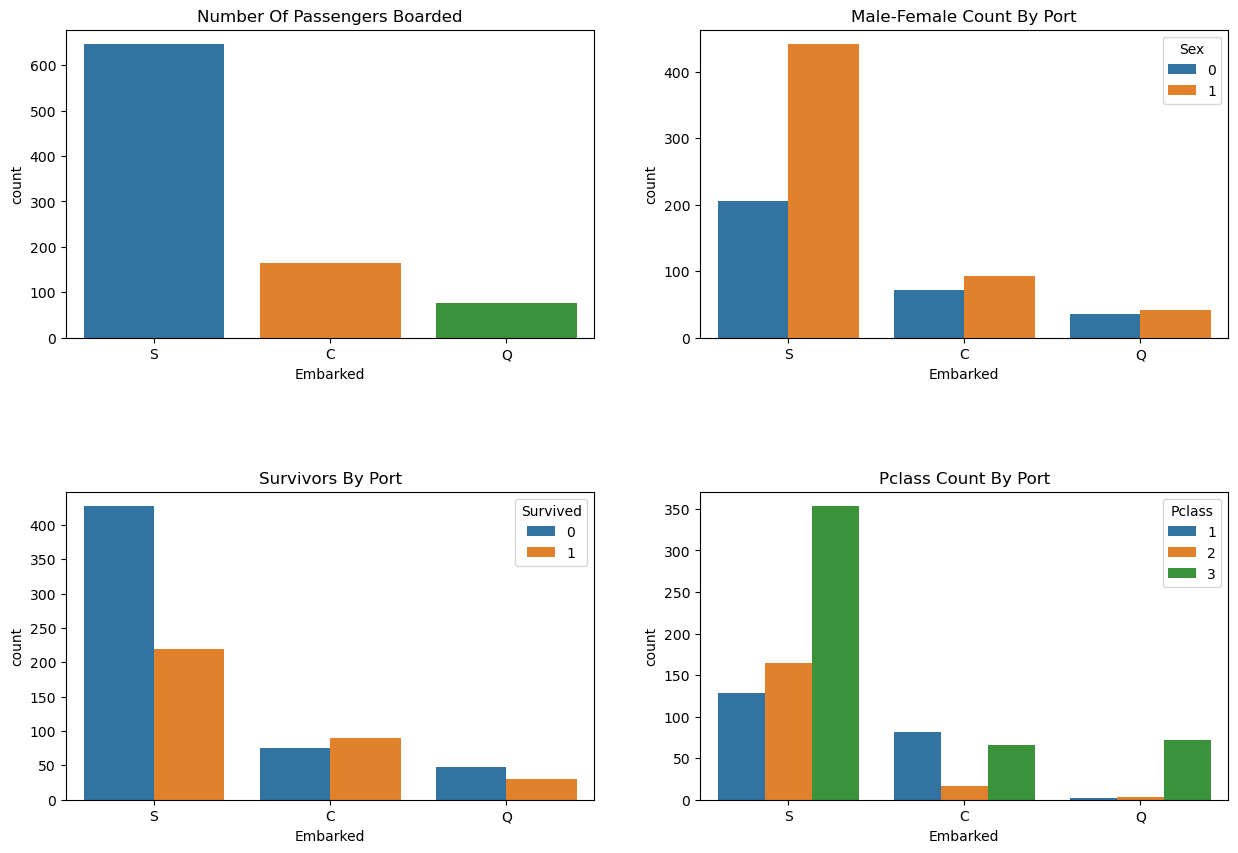

In [43]:
f,ax=plt.subplots(2,2,figsize=(15,10))

sb.countplot(data=train_data, x='Embarked', ax=ax[0,0])
ax[0,0].set_title('Number Of Passengers Boarded')

sb.countplot(data=train_data, x='Embarked', hue='Sex', ax=ax[0,1])
ax[0,1].set_title('Male-Female Count By Port')

sb.countplot(data=train_data, x='Embarked', hue='Survived', ax=ax[1,0])
ax[1,0].set_title('Survivors By Port')

sb.countplot(data=train_data, x='Embarked', hue='Pclass', ax=ax[1,1])
ax[1,1].set_title('Pclass Count By Port')

plt.subplots_adjust(wspace=0.2,hspace=0.5)

##### Conclusions that we can draw from the graphs above are:

1. The majority of the passengers embarked in Southampton with a vast majority of third class passengers. As seen by the high percentage of third class passengers embarking from Southampton, it is likely a factor resulting in a lower survival rate out of the three ports.


2. The high survival rate of passengers from Cherbourg can be attributed to the high number of first class passengers embarking from this port.


3. Most of the passengers from Queenstown were in the third class. Finally, we can observe that women from the first and second classes have nearly 100% chances of being saved, irrespective of their boarding port. 


4. For third class passengers from Southampton, women and men both have a lower survival rate. 


5. As for men from Queenstown, they almost all died in the sinking, whcih could be related to the fact that were mostly from the third class.

### Does number of family members affect chances of survival?

In [41]:
pd.crosstab([train_data.FamilyMembers],train_data.Survived).style.background_gradient(cmap='rocket_r')

Survived,0,1
FamilyMembers,,
0,374,161
1,72,88
2,43,59
3,8,21
4,12,3
5,19,3
6,8,4
7,6,0
10,7,0


In [42]:
pd.crosstab(train_data.FamilyMembers,train_data.Pclass).style.background_gradient(cmap='rocket_r')

Pclass,1,2,3
FamilyMembers,,,
0,107,104,324
1,69,34,57
2,24,31,47
3,7,13,9
4,2,1,12
5,4,1,17
6,0,0,12
7,0,0,6
10,0,0,7


##### Analysis

- From the above data, we can see that as the number of family members goes above 4, the number of passengers surviving reduces significantly. 

- We can also observe that most of the large families are travelling in third class which explains their low survival rate.

### Importance of ticket numbers

Text(0.5, 1.0, 'Survivors By Ticket Count')

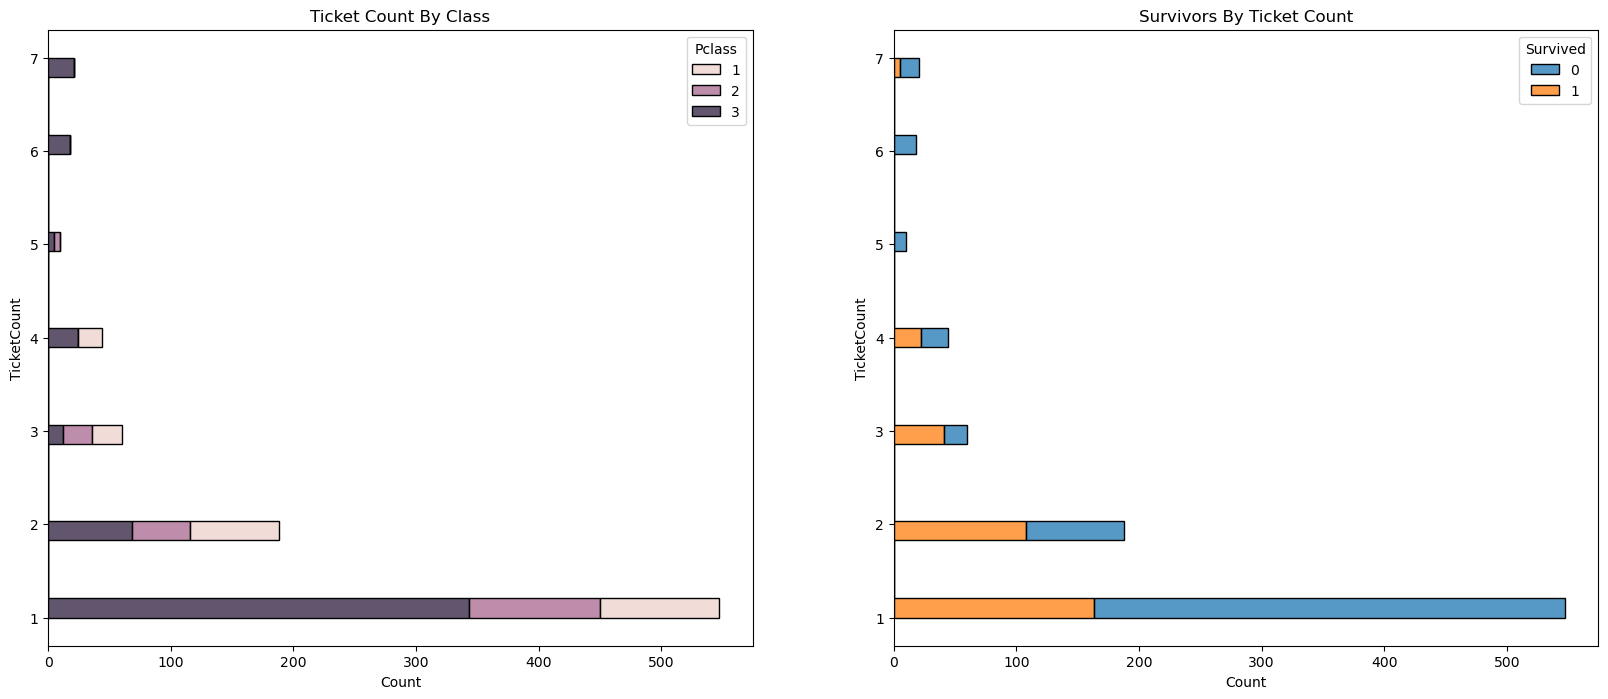

In [45]:
train_copy = train_data.copy()
ticket_count = train_data.groupby('Ticket').size()
train_copy['TicketCount'] = train_copy['Ticket'].map(ticket_count)

f,ax=plt.subplots(1,2,figsize=(20,8))

sb.histplot(data=train_copy, y='TicketCount', hue='Pclass', multiple="stack", ax=ax[0])
ax[0].set_title('Ticket Count By Class')

sb.histplot(data=train_copy, y='TicketCount', hue='Survived', multiple="stack", ax=ax[1])
ax[1].set_title('Survivors By Ticket Count')

##### Analysis

1. We can see that the vast majority of passengers had a unique ticket number.


2. We can assume that people with a duplicate ticket number were from the same family which confirms our previous point, third class passengers were travelling with larger families than the other two classes. 


3. Moreover, we saw that having more than 4 members of your family with you produces a next to zero survival rate, mostly attributed to the fact that these families are from the third class. This is further confirmed here where most people with more than 4 duplicate ticket numbers were from third class and died in the sinking.

# Overall Analysis of EDA

1. Sex : Women have a higher chance of survival than men


2. Pclass : Being a first class passenger gives you a higher survival rate than any other classes. Women from this class nearly have 100% chance of being saved. On the contrary, third class passengers have a really low survival rate.


3. Embarked : Almost only third class passengers embarked from Queenstown. Passengers from Cherbourg have the higher survival rate despite Southampton having the most first class passengers.


4. Having around 1-3 family members on board gives a higher survival rate than travelling alone or having very huge families.


5. Ticket : This variable is highly correlated with the family count of the passenger. Larger families have duplicate ticket numbers, most of which are in third class and therefore, do not survive the sinking.